In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

df= pd.read_csv('Dataset_de_200_Comunidades_para_Analise_Ambiental.csv')
df.columns

Index(['Comunidade', 'Município', 'Estado', 'Índice de Desmatamento (%)',
       'Acesso à Água Potável (%)', 'Cobertura Vegetal (%)',
       'Renda Média Mensal (R$)', 'Densidade Populacional (hab/km²)',
       'Frequência de Queimadas (ano)', 'Distância de Área Urbana (km)',
       'Presença de Escola (Sim/Não)',
       'Presença de Unidade de Saúde (Sim/Não)'],
      dtype='object')

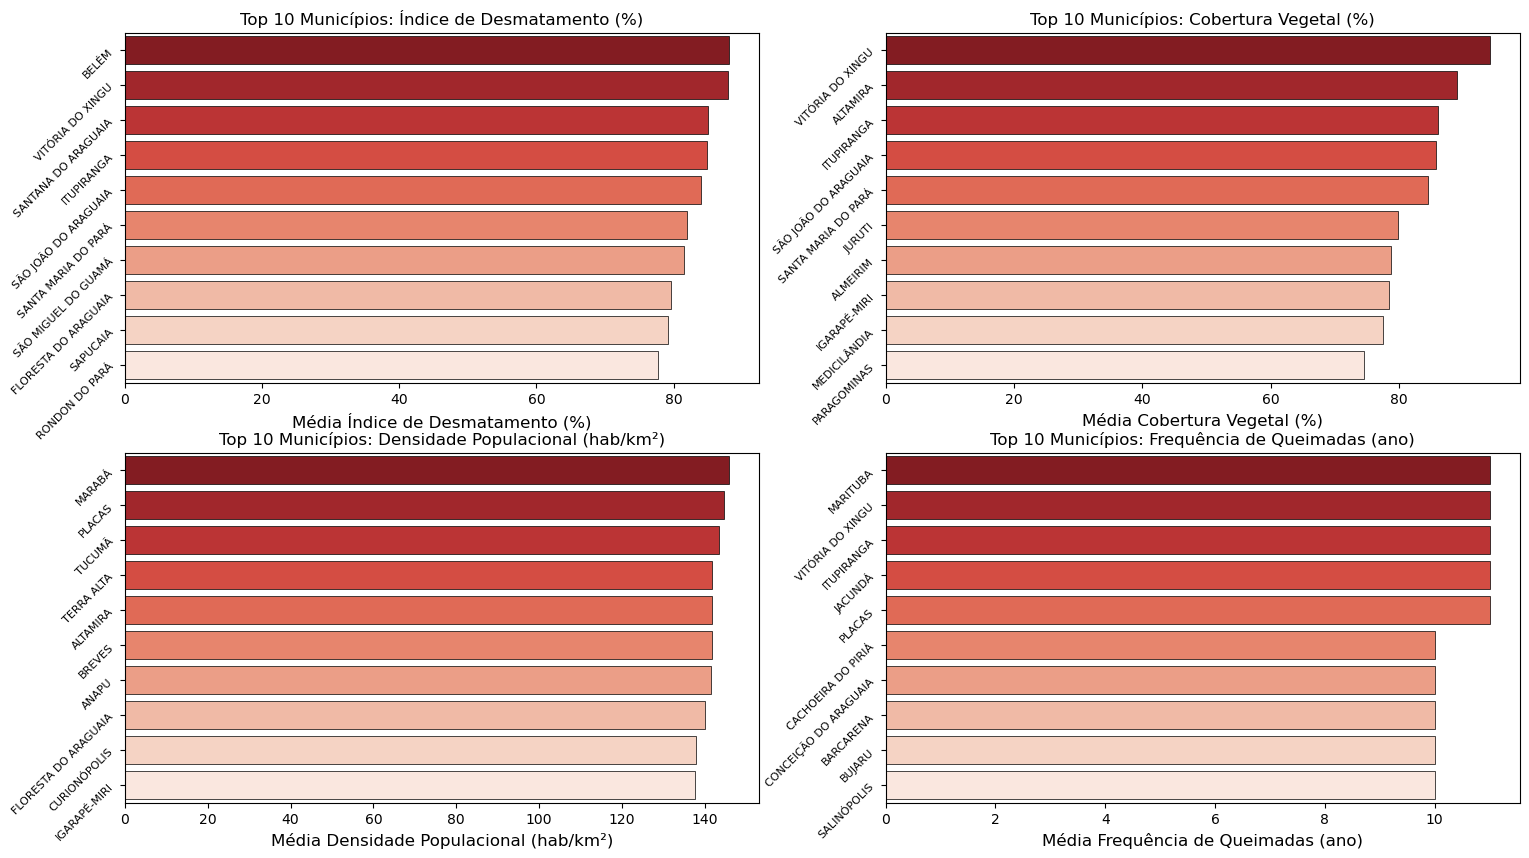

<Figure size 1200x800 with 0 Axes>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Comunidade                              200 non-null    object 
 1   Município                               200 non-null    object 
 2   Estado                                  200 non-null    object 
 3   Índice de Desmatamento (%)              200 non-null    float64
 4   Acesso à Água Potável (%)               200 non-null    float64
 5   Cobertura Vegetal (%)                   200 non-null    float64
 6   Renda Média Mensal (R$)                 200 non-null    float64
 7   Densidade Populacional (hab/km²)        200 non-null    float64
 8   Frequência de Queimadas (ano)           200 non-null    int64  
 9   Distância de Área Urbana (km)           200 non-null    float64
 10  Presença de Escola (Sim/Não)            200 non-null    object

,Município,Comunidade,Índice de Desmatamento (%)
97,VIGIA,5,5
93,TRACUATEUA,5,5
70,RURÓPOLIS,5,5
74,SANTA MARIA DAS BARREIRAS,4,4
82,SÃO DOMINGOS DO CAPIM,4,4
65,PORTO DE MOZ,4,4
23,CAPANEMA,4,4
73,SANTA ISABEL DO PARÁ,4,4
36,GURUPÁ,4,4
60,PARAUAPEBAS,4,4


In [3]:
#print(df.info())
# 1. Agrupamento 
gp1= df.groupby('Município')[df.columns[3]].agg(['mean']).reset_index().sort_values('mean', ascending=False) #desmatamento
gp2= df.groupby('Município')[df.columns[5]].agg(['mean']).reset_index().sort_values('mean', ascending=False) #cobertura vegetal
gp3= df.groupby('Município')[df.columns[7]].agg(['mean']).reset_index().sort_values('mean', ascending=False) #Densidade Populacional
gp4= df.groupby('Município')[df.columns[8]].agg(['mean']).reset_index().sort_values('mean', ascending=False)  #frequencia de queimadas

contagem_com= df.groupby('Município')['Comunidade'].count().reset_index()
# 2. Top 10 municípios com maior média de queimadas
top10 = gp1.head(10)

fig, axs = plt.subplots(2, 2, figsize=(18, 10))
plt.figure(figsize=(12, 8))
sns.barplot(data=top10, x='mean', y='Município', palette='Reds_r', edgecolor='black', linewidth=0.5, ax=axs[0, 0])
axs[0,0].set_title('Top 10 Municípios: '+df.columns[3], fontsize=12)
axs[0,0].set_xlabel('Média '+df.columns[3], fontsize=12)
axs[0,0].set_ylabel('')
axs[0,0].tick_params(axis='y', labelsize=8,rotation=45)  


top10 = gp2.head(10)
sns.barplot(data=top10, x='mean', y='Município', palette='Reds_r', edgecolor='black', linewidth=0.5, ax=axs[0, 1])
axs[0,1].set_title('Top 10 Municípios: '+df.columns[5], fontsize=12)
axs[0,1].set_xlabel('Média '+df.columns[5], fontsize=12)
axs[0,1].set_ylabel('')

axs[0,1].tick_params(axis='y', labelsize=8,rotation=45) 

top10 = gp3.head(10)
sns.barplot(data=top10, x='mean', y='Município', palette='Reds_r', edgecolor='black', linewidth=0.5, ax=axs[1, 0])
axs[1,0].set_title('Top 10 Municípios: '+df.columns[7], fontsize=12)
axs[1,0].set_xlabel('Média '+df.columns[7], fontsize=12)
axs[1,0].set_ylabel('')

axs[1,0].tick_params(axis='y', labelsize=8,rotation=45) 

top10 = gp4.head(10)
sns.barplot(data=top10, x='mean', y='Município', palette='Reds_r', edgecolor='black', linewidth=0.5, ax=axs[1, 1])
axs[1,1].set_title('Top 10 Municípios: '+df.columns[8], fontsize=12)
axs[1,1].set_xlabel('Média '+df.columns[8], fontsize=12)
axs[1,1].set_ylabel('')

axs[1,1].tick_params(axis='y', labelsize=8,rotation=45) 



# plt.ylabel('Município', fontsize=12)
# plt.grid(axis='x', linestyle='--', alpha=0.6)

# for i, v in enumerate(lista['mean']):
#     plt.text(v + 0.2, i, f"{v:.1f}", color='black', va='center')

plt.tight_layout()
plt.show()

df.columns
df.info()
pd.set_option('display.max_rows', None)



contagem_com= df.groupby('Município')[['Comunidade' ,'Índice de Desmatamento (%)']].count().reset_index()

contagem_com.sort_values(by='Comunidade',ascending=False)



In [228]:
total_comunidades_por_municipio = df.groupby('Município')['Comunidade'].count().reset_index()
total_comunidades_por_municipio.rename(columns={'Comunidade': 'Total de Comunidades'}, inplace=True)

media_desmatamento_por_municipio = df.groupby('Município')['Índice de Desmatamento (%)'].mean().reset_index()
media_desmatamento_por_municipio.rename(columns={'Índice de Desmatamento (%)': 'Média de Desmatamento (%)'}, inplace=True)

df_municipio_desmatamento = pd.merge(total_comunidades_por_municipio, media_desmatamento_por_municipio, on='Município')

df_municipio_desmatamento.sort_values(by='Total de Comunidades',ascending=False) 

,Município,Total de Comunidades,Média de Desmatamento (%)
97,VIGIA,5,47.700000
93,TRACUATEUA,5,70.360000
70,RURÓPOLIS,5,48.480000
74,SANTA MARIA DAS BARREIRAS,4,47.500000
82,SÃO DOMINGOS DO CAPIM,4,41.325000
65,PORTO DE MOZ,4,45.550000
23,CAPANEMA,4,67.125000
73,SANTA ISABEL DO PARÁ,4,59.325000
36,GURUPÁ,4,29.325000
60,PARAUAPEBAS,4,43.100000


In [229]:
df['Índice de Desmatamento (%)'].describe()

count    200.000000
mean      47.588000
std       25.011311
min        5.400000
25%       26.000000
50%       51.050000
75%       67.550000
max       89.200000
Name: Índice de Desmatamento (%), dtype: float64

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('figura 6: Matriz de Correlação')
plt.show()

ValueError: could not convert string to float: 'Comunidade 1'

In [61]:
correlation_matrix 

,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Presença de Escola (Sim/Não),Presença de Unidade de Saúde (Sim/Não)
Índice de Desmatamento (%),1.000000,-0.104926,0.021803,-0.052257,0.055411,-0.103270,0.052848,-0.008802,-0.039263
Acesso à Água Potável (%),-0.104926,1.000000,0.070748,-0.019238,0.062563,-0.117572,-0.035149,0.154770,-0.000948
Cobertura Vegetal (%),0.021803,0.070748,1.000000,-0.012554,0.145006,0.116379,0.001207,0.030510,-0.001166
Renda Média Mensal (R$),-0.052257,-0.019238,-0.012554,1.000000,-0.032826,-0.059823,0.035842,0.015428,-0.002136
Densidade Populacional (hab/km²),0.055411,0.062563,0.145006,-0.032826,1.000000,0.038724,0.076578,-0.032026,-0.039986
Frequência de Queimadas (ano),-0.103270,-0.117572,0.116379,-0.059823,0.038724,1.000000,0.006542,-0.035648,0.076217
Distância de Área Urbana (km),0.052848,-0.035149,0.001207,0.035842,0.076578,0.006542,1.000000,0.044792,0.065611
Presença de Escola (Sim/Não),-0.008802,0.154770,0.030510,0.015428,-0.032026,-0.035648,0.044792,1.000000,0.116470
Presença de Unidade de Saúde (Sim/Não),-0.039263,-0.000948,-0.001166,-0.002136,-0.039986,0.076217,0.065611,0.116470,1.000000


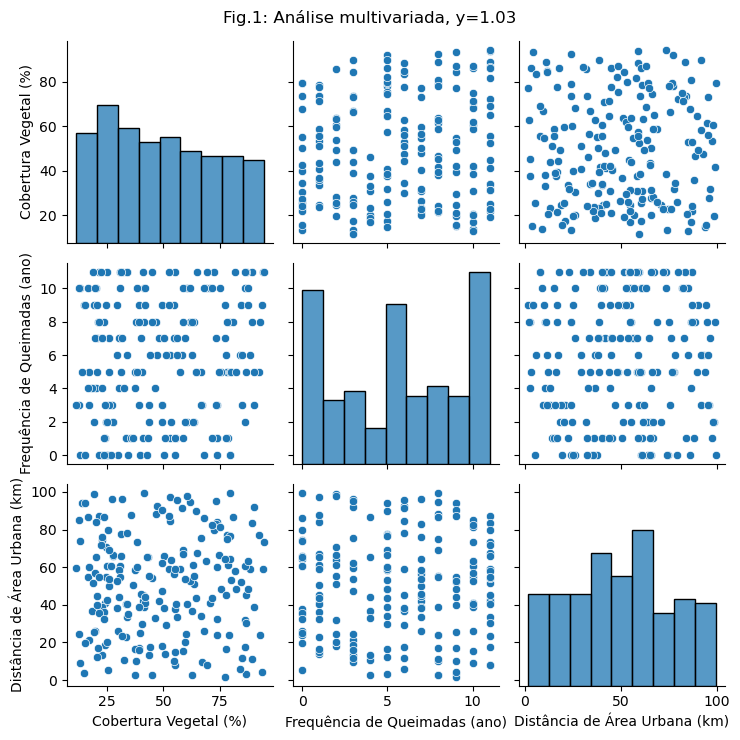

In [201]:
df2 = df[[ 'Cobertura Vegetal (%)',
                       'Frequência de Queimadas (ano)',
                       'Distância de Área Urbana (km)']]

sns.pairplot(df2);
plt.suptitle('Fig.1: Análise multivariada, y=1.03'); 
plt.tight_layout();
plt.show();

In [10]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time

# Seu DataFrame (exemplo com alguns dados)

df= pd.read_csv('Dataset_de_200_Comunidades_para_Analise_Ambiental.csv')


# Inicializar o geocodificador Nominatim
geolocator = Nominatim(user_agent="geo_localizador_comunidades")

# Função para obter as coordenadas geográficas com tratamento de erros
def get_coordinates(city_name, state='Pará', country='Brasil', max_retries=3, timeout=5):
    for attempt in range(max_retries):
        try:
            location = geolocator.geocode(f"{city_name}, {state}, {country}", timeout=timeout)
            if location:
                return location.latitude, location.longitude
            return None, None
        except GeocoderTimedOut:
            print(f"Timeout ao geocodificar {city_name}, tentativa {attempt + 1}/{max_retries}...")
            time.sleep(2 ** attempt)  # Espera exponencial
        except GeocoderServiceError as e:
            print(f"Erro de serviço ao geocodificar {city_name}: {e}")
            return None, None
        except Exception as e:
            print(f"Erro inesperado ao geocodificar {city_name}: {e}")
            return None, None
    print(f"Falha ao geocodificar {city_name} após {max_retries} tentativas.")
    return None, None

# Criar listas vazias para armazenar latitude e longitude
latitudes = []
longitudes = []

# Obter as coordenadas para cada município único no DataFrame
municipios_unicos = df['Município'].unique()
coordenadas_municipios = {}

print("Obtendo coordenadas dos municípios:")
for municipio in municipios_unicos:
    if municipio not in coordenadas_municipios:
        coords = get_coordinates(municipio)
        if coords:
            coordenadas_municipios[municipio] = coords
            print(f"Coordenadas de {municipio}: Latitude={coords[0]:.2f}, Longitude={coords[1]:.2f}")
        else:
            print(f"Não foi possível encontrar as coordenadas de {municipio}")
    else:
        print(f"Coordenadas de {municipio} já foram obtidas.")

# Adicionar latitude e longitude ao DataFrame com base na coluna 'Município'
print("\nAdicionando coordenadas ao DataFrame:")
for index, row in df.iterrows():
    municipio = row['Município']
    if municipio in coordenadas_municipios:
        lat, lon = coordenadas_municipios[municipio]
        latitudes.append(lat)
        longitudes.append(lon)
        print(f"Comunidade {row['Comunidade']} ({municipio}): Latitude={lat:.2f}, Longitude={lon:.2f}")
    else:
        latitudes.append(None)
        longitudes.append(None)
        print(f"Comunidade {row['Comunidade']} ({municipio}): Coordenadas não encontradas.")

# Adicionar as novas colunas ao DataFrame
df['Latitude'] = latitudes
df['Longitude'] = longitudes

# Exibir o DataFrame com as colunas de latitude e longitude
print("\nDataFrame com Latitudes e Longitudes:")

#df.to_csv('Dataset_de_200_Comunidades_para_Analise_Ambiental2.csv', index=False, encoding='utf-8')


Obtendo coordenadas dos municípios:
Coordenadas de SÃO DOMINGOS DO CAPIM: Latitude=-1.68, Longitude=-47.77
Coordenadas de SALINÓPOLIS: Latitude=-0.63, Longitude=-47.34
Coordenadas de TRACUATEUA: Latitude=-1.08, Longitude=-46.90
Coordenadas de SÃO MIGUEL DO GUAMÁ: Latitude=-1.61, Longitude=-47.48
Coordenadas de MAGALHÃES BARATA: Latitude=-0.80, Longitude=-47.60
Coordenadas de PALESTINA DO PARÁ: Latitude=-5.74, Longitude=-48.32
Coordenadas de CURIONÓPOLIS: Latitude=-6.10, Longitude=-49.61
Coordenadas de MARAPANIM: Latitude=-0.71, Longitude=-47.70
Coordenadas de PONTA DE PEDRAS: Latitude=-1.39, Longitude=-48.87
Coordenadas de XINGUARA: Latitude=-7.10, Longitude=-49.94
Coordenadas de SANTARÉM NOVO: Latitude=-0.93, Longitude=-47.40
Coordenadas de SÃO FÉLIX DO XINGU: Latitude=-6.64, Longitude=-51.98
Coordenadas de SANTA MARIA DAS BARREIRAS: Latitude=-8.87, Longitude=-49.72
Coordenadas de CAPANEMA: Latitude=-1.19, Longitude=-47.18
Coordenadas de BANNACH: Latitude=-7.35, Longitude=-50.41
Coord

In [12]:
df.to_csv('Dataset_de_200_Comunidades_para_Analise_Ambiental2.csv', index=False, encoding='utf-8')
